In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('D:/Machine learning/Practices/Data sets/Customer-Churn-Prediction.csv')

In [4]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

c:\users\jobaear hossain\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn', ylabel='count'>

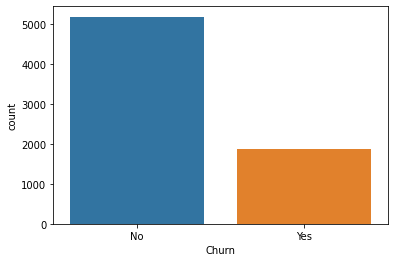

In [9]:
sn.countplot(data['Churn'])

In [10]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

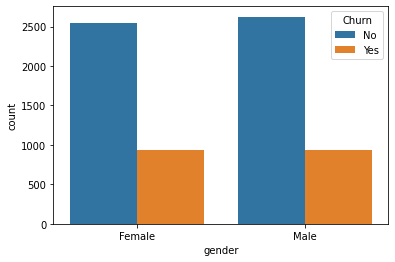

In [11]:
sn.countplot(x='gender',hue='Churn',data=data)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

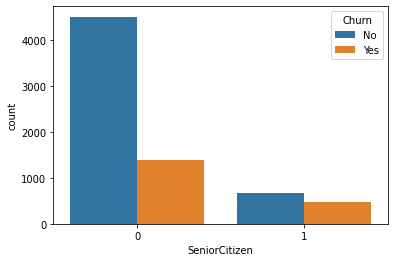

In [12]:
sn.countplot(x='SeniorCitizen',hue='Churn',data=data)

In [14]:
data = data.drop('customerID', axis=1)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
for column in data.columns:
    if data[column].dtype == np.number:
        continue
    data[column] = le.fit_transform(data[column])

<ipython-input-17-31f68233fda5>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:


In [18]:
x = data.iloc[:,:-1]

In [19]:
y = data.iloc[:,19:]

In [20]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [21]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()

In [24]:
featured_x = sc.fit_transform(x)

In [25]:
featured_x

array([[-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.16032292, -0.39860759],
       [ 0.99053183, -0.44014635, -0.96662231, ...,  1.33486261,
        -0.25962894, -0.94876238],
       [ 0.99053183, -0.44014635, -0.96662231, ...,  1.33486261,
        -0.36266036, -1.64188328],
       ...,
       [-1.00955867, -0.44014635,  1.03453023, ...,  0.39855772,
        -1.1686319 , -0.13968008],
       [ 0.99053183,  2.27197156,  1.03453023, ...,  1.33486261,
         0.32033821, -0.31653445],
       [ 0.99053183, -0.44014635, -0.96662231, ..., -1.47405205,
         1.35896134,  1.13801338]])

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(featured_x,y,test_size=0.3,random_state=1)

In [28]:
xtest

array([[-1.00955867, -0.44014635, -0.96662231, ..., -1.47405205,
         0.50147408, -0.19739603],
       [-1.00955867,  2.27197156, -0.96662231, ..., -1.47405205,
         1.25094453,  1.02681751],
       [-1.00955867, -0.44014635, -0.96662231, ..., -1.47405205,
        -0.65679842,  0.60056669],
       ...,
       [ 0.99053183,  2.27197156, -0.96662231, ..., -1.47405205,
         1.06482327, -0.84445007],
       [-1.00955867, -0.44014635,  1.03453023, ..., -1.47405205,
        -0.21143683,  0.13142604],
       [-1.00955867, -0.44014635, -0.96662231, ...,  1.33486261,
         0.29208766, -0.18680594]])

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()

In [31]:
lr.fit(xtrain,ytrain)

c:\users\jobaear hossain\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [32]:
lr.score(xtest,ytest)

0.8102224325603408